# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **Food.com Recipe Recommendation Engine** |

# II. Notebook Target Definition

This notebook delineates the exploratory data analysis (EDA) and preprocessing steps essential for the Food.com Recipe Recommendation Engine Project. Utilizing the cleaned and prepared Food.com dataset as our starting point, we engage in exhaustive EDA to unearth underlying trends, anomalies, and interrelationships among recipe attributes, all of which are substantiated through an array of visualizations. Concurrently, we tackle any missing or incomplete values to uphold the data's integrity. Rather than proceeding with normalization or other transformations, we directly split the dataset into training and testing subsets. This approach ensures the data is in a practical format for immediate use in the subsequent recommendation algorithms. The final output of this notebook is a meticulously segmented dataset, laying the groundwork for the ensuing stages in our analytical workflow, including feature engineering and model training.

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
df = pd.read_pickle('../../data/processed/df_filtered.pkl')

In [3]:
df.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,2002068522,29093,2018-03-26,0,i made it and it was amazing,petit gateau,27,30475,2002-05-21,"['30-minutes-or-less', 'time-to-make', 'course...","[425.4, 49.0, 90.0, 1.0, 15.0, 94.0, 11.0]",19,['break the chocolate and butter into small pi...,this is a terribly easy to make recipe of a de...,"['dark chocolate', 'unsalted butter', 'eggs', ...",7
1,2002097693,79222,2018-04-05,0,Do you have cook the potatoes beforehand?,potato crab chowder,45,115419,2003-12-18,"['60-minutes-or-less', 'time-to-make', 'course...","[274.2, 12.0, 15.0, 18.0, 32.0, 22.0, 12.0]",8,['saute onion& garlic in melted butter in larg...,soup for the soul!,"['butter', 'onion', 'garlic', 'potatoes', 'flo...",13
2,422608,441096,2016-02-26,5,"I didn&#039;t follow the instructions exactly,...",pumpkin chili,620,31807,2010-11-03,"['course', 'main-ingredient', 'preparation', '...","[322.9, 19.0, 18.0, 19.0, 42.0, 23.0, 11.0]",3,"['combine all ingredients in slow cooker', 'co...",add some fall flavor and some additional nutri...,"['ground beef', 'pumpkin puree', 'kidney beans...",7
3,2001891832,183729,2018-04-30,0,There is no cooking temp?????? Love this recip...,spaghetti corn,5,299289,2006-08-29,"['15-minutes-or-less', 'time-to-make', 'main-i...","[412.5, 24.0, 16.0, 20.0, 24.0, 46.0, 19.0]",5,"['mix all ingredients together', 'pour into 9x...",my mom found this in a news paper and decided ...,"['cream-style corn', 'whole kernel corn', 'spa...",5
4,2001338551,195977,2017-04-04,0,Have made this cake often. Have added 1 1/2 c ...,st louis style gooey butter cake,50,385857,2006-11-17,"['60-minutes-or-less', 'time-to-make', 'course...","[588.7, 37.0, 279.0, 21.0, 11.0, 57.0, 29.0]",28,"['preheat oven to 350', 'lightly grease one de...",what is gooey butter cake you ask? it is a sup...,"['butter', 'yellow cake mix', 'eggs', 'cream c...",6


# IV. Exploratory Data Analysis

## IV.A. Data Shape Inspection

In [4]:
df.shape

(65604, 16)

## IV.B. Data Information Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65604 entries, 0 to 65603
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         65604 non-null  int64         
 1   recipe_id       65604 non-null  int64         
 2   date            65604 non-null  datetime64[ns]
 3   rating          65604 non-null  int64         
 4   review          65440 non-null  object        
 5   name            65604 non-null  object        
 6   minutes         65604 non-null  int64         
 7   contributor_id  65604 non-null  int64         
 8   submitted       65604 non-null  datetime64[ns]
 9   tags            65604 non-null  object        
 10  nutrition       65604 non-null  object        
 11  n_steps         65604 non-null  int64         
 12  steps           65604 non-null  object        
 13  description     65604 non-null  object        
 14  ingredients     65604 non-null  object        
 15  n_

## IV.C. Missing Values Inspection

In [6]:
df_missing = pd.DataFrame(
    df.isnull().sum().sort_values() / len(df) * 100).reset_index()
df_missing.columns = ["variables", "missing_percentage"]
df_missing

,variables,missing_percentage
0,user_id,0.000000
1,recipe_id,0.000000
2,date,0.000000
3,rating,0.000000
4,name,0.000000
5,minutes,0.000000
6,contributor_id,0.000000
7,submitted,0.000000
8,tags,0.000000
9,nutrition,0.000000


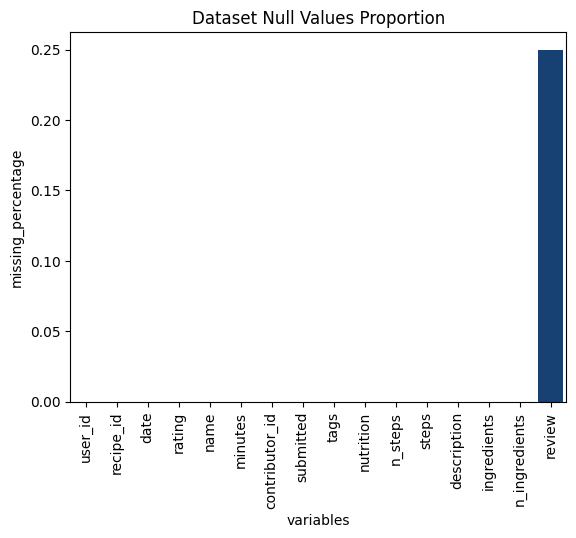

In [7]:
sns.barplot(data=df_missing,
            x="variables",
            y="missing_percentage",
            palette='Blues')
plt.title("Dataset Null Values Proportion")
plt.xticks(rotation='vertical')
plt.show()

## IV.D. Duplicated Values Inspection

In [8]:
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated.shape

(0, 16)

In [9]:
df_duplicated

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients


## IV.E. Data Visualization

### IV.E.1. Ratings Distribution

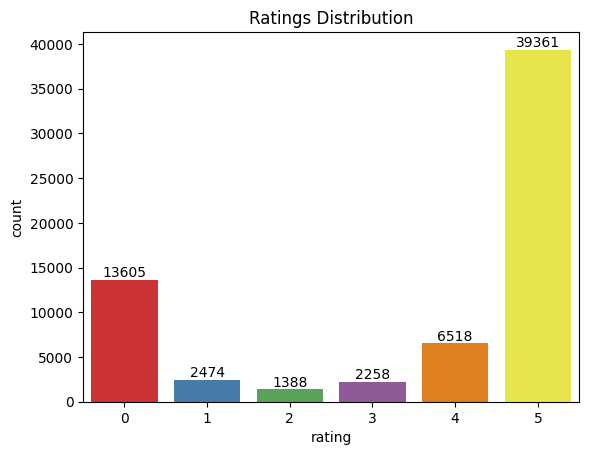

In [10]:
plt.title("Ratings Distribution")
ratings_distribution = sns.countplot(data=df, x="rating", palette='Set1')
ratings_distribution.bar_label(ratings_distribution.containers[0])
plt.show()

### IV.E.2. Top 10 Most Rated Recipes

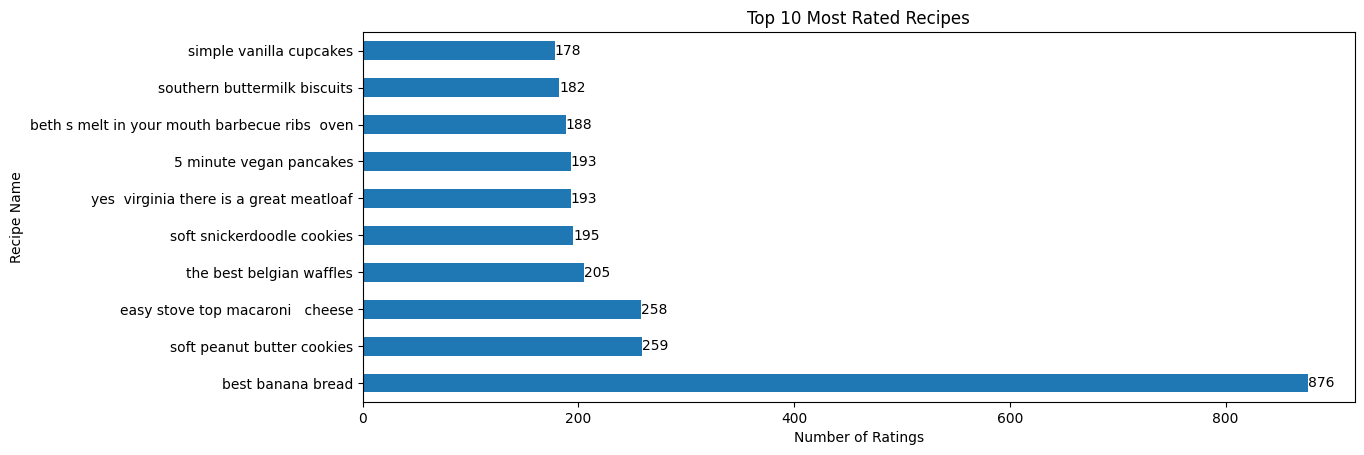

In [11]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Top 10 Most Rated Recipes")
ratings_per_recipe = df.groupby(
    "name")["rating"].count().sort_values(ascending=False)
bars = ratings_per_recipe.head(10).plot(kind='barh')
for bar in bars.containers:
    bars.bar_label(bar)
plt.xlabel("Number of Ratings")
plt.ylabel("Recipe Name")
plt.show()

### IV.E.3. Top 10 Users with Most Ratings

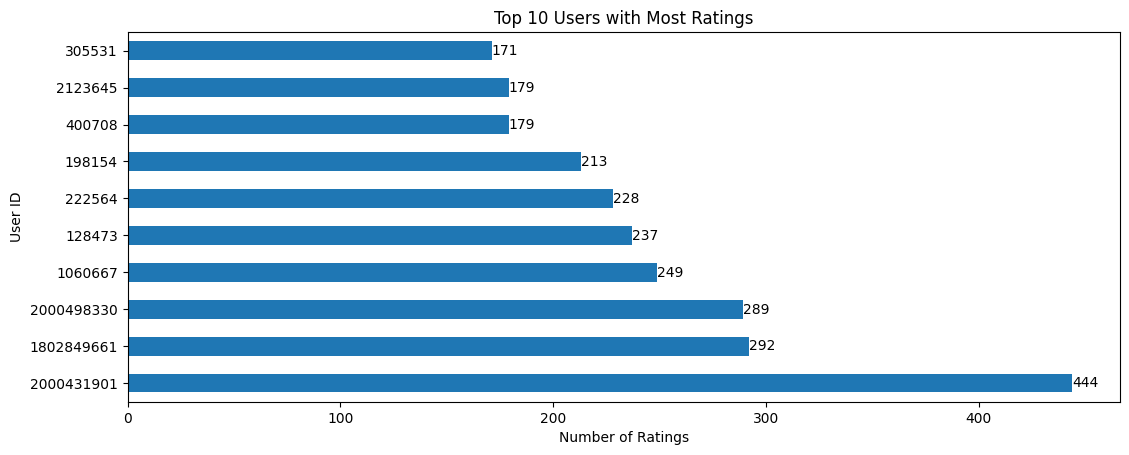

In [12]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Top 10 Users with Most Ratings")
ratings_per_user = df.groupby(
    "user_id")["rating"].count().sort_values(ascending=False)
bars = ratings_per_user.head(10).plot(kind='barh')
for bar in bars.containers:
    bars.bar_label(bar)
plt.xlabel("Number of Ratings")
plt.ylabel("User ID")
plt.show()

### IV.E.4. Distribution of Number of Ingredients per Recipe

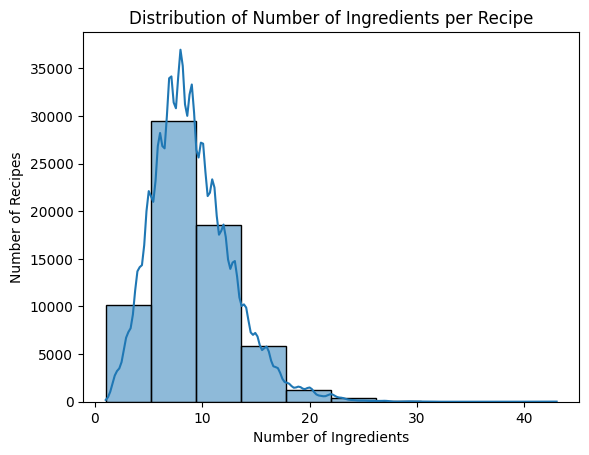

In [13]:
sns.histplot(df["n_ingredients"], bins=10, kde=True)
plt.title("Distribution of Number of Ingredients per Recipe")
plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Recipes")
plt.show()

### IV.E.5. Distribution of Preparation Time

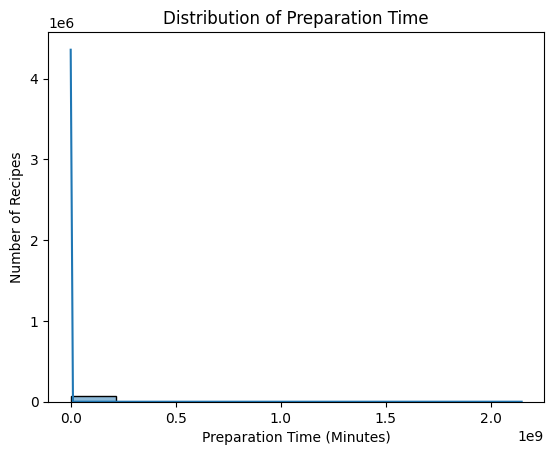

In [14]:
sns.histplot(df["minutes"], bins=10, kde=True)
plt.title("Distribution of Preparation Time")
plt.xlabel("Preparation Time (Minutes)")
plt.ylabel("Number of Recipes")
plt.show()

### IV.E.6. Most Common Words in Reviews

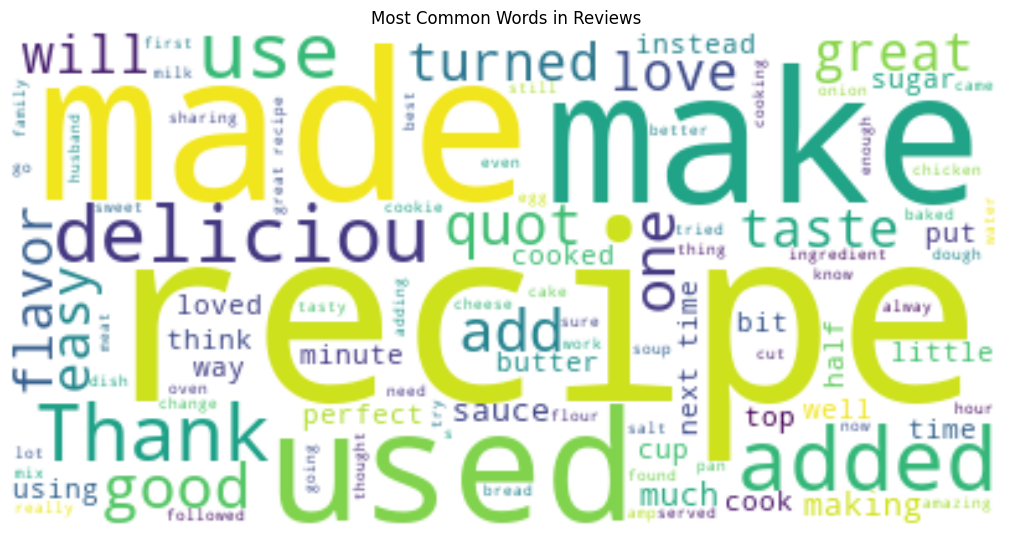

In [15]:
text = ' '.join(df["review"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Reviews")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### IV.E.7. Most Common Words in Ingredients

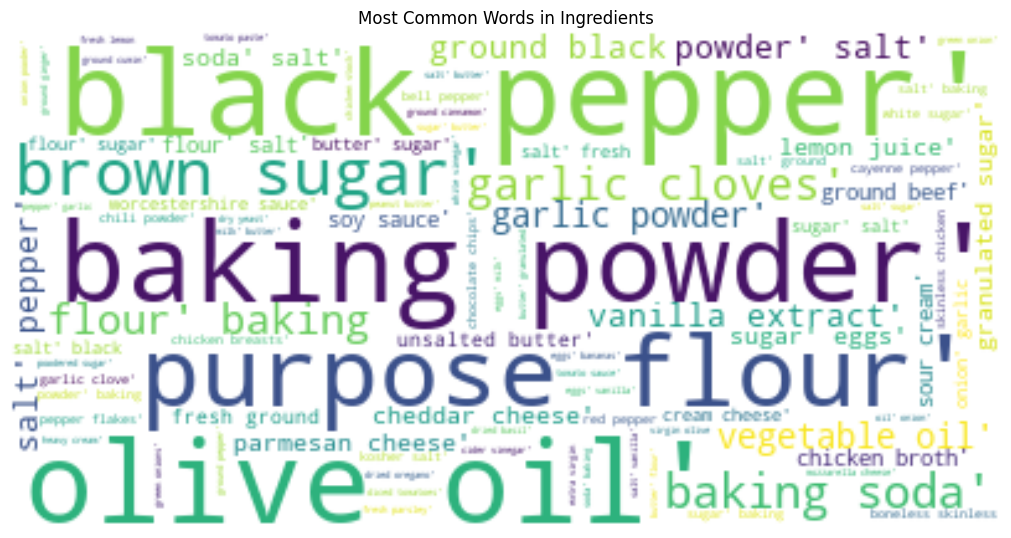

In [16]:
text = ' '.join(df["ingredients"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Ingredients")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## IV.G. Correlation Matrix

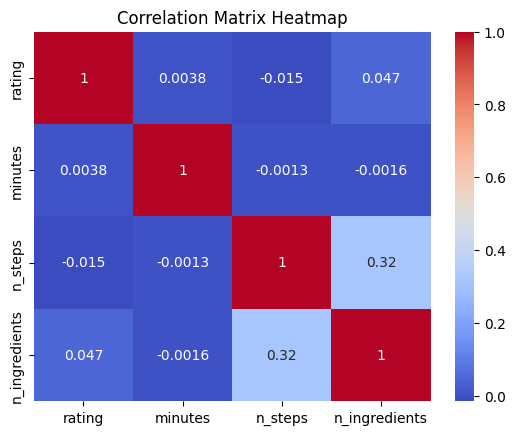

In [17]:
corr_matrix = df[["rating", "minutes", "n_steps", "n_ingredients"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# V. Preprocessing

## V.A. Data Splitting

In [18]:
users_with_one_rating = df["user_id"].value_counts(
)[df["user_id"].value_counts() == 1].index
df_filtered = df[~df["user_id"].isin(users_with_one_rating)]
train, test = train_test_split(
    df_filtered, test_size=0.3, random_state=777, stratify=df_filtered["user_id"])

In [19]:
train.shape, test.shape

((13652, 16), (5851, 16))

## V.B. Export Data

In [20]:
train.to_pickle('../../data/processed/train.pkl')
test.to_pickle('../../data/processed/test.pkl')